# Практика визуализации данных - датасет Open Food Facts

## Добро пожаловать на практическое занятие!

После изучения различных техник визуализации на лекции с датасетом Iris, пришло время применить эти навыки к реальному датасету. Сегодня мы будем работать с датасетом **Open Food Facts** - коллаборативной базой данных пищевых продуктов со всего мира.

### Цели обучения:
- Применить техники визуализации, изученные на лекции
- Работать с большим, более сложным реальным датасетом
- Практиковать очистку и предобработку данных
- Создавать осмысленные выводы из данных пищевой промышленности

### О датасете Open Food Facts:
База данных Open Food Facts содержит информацию о пищевых продуктах, включая:
- **Пищевую ценность** (калории, белки, жиры, углеводы)
- **Категории продуктов** (напитки, закуски, молочные продукты и т.д.)
- **Ингредиенты и добавки**
- **Nutri-Score** (рейтинг пищевой ценности A-E)
- **Географическую информацию** (страны, бренды)

### Источник датасета:
- **URL:** https://world.openfoodfacts.org/
- **Файл:** en.openfoodfacts.org.products.tsv
- **Формат:** Значения, разделенные табуляцией (TSV)
- **Размер:** Несколько сотен тысяч продуктов

### Что вы будете практиковать:
1. **Загрузка и исследование данных** - Понимание структуры датасета
2. **Базовая визуализация** - Диаграммы рассеяния, гистограммы, коробчатые диаграммы
3. **Продвинутые техники** - Многомерный анализ, корреляции
4. **Реальные выводы** - Анализ питания, сравнение брендов

## Настройка - Импорт библиотек

**Инструкции:** Выполните ячейку ниже для импорта всех необходимых библиотек для нашего анализа. Это те же библиотеки, которые мы использовали на лекции, плюс несколько дополнительных для работы с большими датасетами.

In [5]:
# Импорт основных библиотек для анализа данных и визуализации
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates, radviz

# Настройка параметров визуализации
import warnings
warnings.filterwarnings("ignore")
plt.style.use('default')
sns.set_palette("husl")

# Настройки отображения для лучшего вывода
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

print("Все библиотеки успешно импортированы!")
print("Готовы начать практику визуализации данных!")

Все библиотеки успешно импортированы!
Готовы начать практику визуализации данных!


## Упражнение 1: Загрузка данных и первичное исследование

### Инструкции:
1. **Скачайте датасет** с https://world.openfoodfacts.org/ (en.openfoodfacts.org.products.tsv)
2. **Поместите файл** в ту же директорию, что и этот блокнот
3. **Загрузите данные** используя pandas (файл разделен табуляцией, используйте `sep='\t'`)
4. **Исследуйте базовые свойства** датасета

### Ваши задачи:
- Загрузить датасет в pandas DataFrame
- Отобразить первые несколько строк
- Проверить форму (количество строк и столбцов)
- Посмотреть на названия столбцов и типы данных
- Выявить пропущенные значения

In [6]:
import pandas as pd
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep = '\t', nrows = 100000, low_memory = False, on_bad_lines="skip")

In [7]:
# TODO: Загрузите датасет Open Food Facts
# Подсказка: Используйте pd.read_csv() с параметром sep='\t'

# Пока что создадим образец кода загрузки (раскомментируйте и измените, когда у вас будет файл)
print("📁 Пожалуйста, скачайте датасет и поместите его в ту же директорию, что и этот блокнот")
print("🔗 Скачать с: https://world.openfoodfacts.org/")
print("📄 Имя файла: en.openfoodfacts.org.products.tsv")
print("")
print("Затем раскомментируйте и выполните следующий код:")
print("# df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\\t', low_memory=False)")

# Образец кода для загруженного датасета:
# print(f"Размер датасета: {df.shape}")
# print(f"Столбцов: {len(df.columns)}")
# df.head()

📁 Пожалуйста, скачайте датасет и поместите его в ту же директорию, что и этот блокнот
🔗 Скачать с: https://world.openfoodfacts.org/
📄 Имя файла: en.openfoodfacts.org.products.tsv

Затем раскомментируйте и выполните следующий код:
# df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)


In [3]:
print(f"Размер датасета: {df.shape}")
print(f"Столбцов: {len(df.columns)}")
df.head()

Размер датасета: (100000, 214)
Столбцов: 214


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
0,2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1722606455,2024-08-02T13:47:35Z,1749171851,2025-06-06T01:04:11Z,altroconsumo,1749171851,2025-06-06T01:04:11Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1752485388,2025-07-14T09:29:48Z,1752485389,2025-07-14T09:29:49Z,NaN,1752485389,2025-07-14T09:29:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,http://world-en.openfoodfacts.org/product/0000...,elcoco,1560176426,2019-06-10T14:20:26Z,1748094869,2025-05-24T13:54:29Z,smoothie-app,1748094869,2025-05-24T13:54:29Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1754314021,2025-08-04T13:27:01Z,1754314023,2025-08-04T13:27:03Z,NaN,1754314023,2025-08-04T13:27:03Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,http://world-en.openfoodfacts.org/product/0000...,maldan,1732037972,2024-11-19T17:39:32Z,1749357659,2025-06-08T04:40:59Z,smoothie-app,1749357659,2025-06-08T04:40:59Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Упражнение 2: Очистка данных и предобработка

### Инструкции:
После загрузки датасета вы заметите, что в нем много столбцов и пропущенных значений. Давайте сосредоточимся на данных о пищевой ценности для нашего анализа.

### Ключевые столбцы для анализа:
- `product_name` - Название продукта
- `categories` - Категории продукта
- `countries` - Страны, где продается
- `energy_100g` - Энергия на 100г (ккал)
- `proteins_100g` - Белки на 100г
- `carbohydrates_100g` - Углеводы на 100г
- `fat_100g` - Жиры на 100г
- `sugars_100g` - Сахара на 100г
- `sodium_100g` - Натрий на 100г
- `nutriscore_grade` - Пищевая оценка (A, B, C, D, E)

### Ваши задачи:
1. Выберите только релевантные столбцы для анализа
2. Удалите строки с отсутствующими данными о питании
3. Создайте чистый датасет для визуализации
4. Изучите распределение оценок Nutri-Score

In [8]:
# TODO: Очистка данных и предобработка
# Раскомментируйте и измените этот код, когда загрузите датасет

# Выберите релевантные столбцы для анализа питания
nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]

# CODE

print("Шаги очистки для реализации:")
print("1. Выбрать столбцы питания")
print("2. Удалить строки с пропущенными значениями")
print("3. Отфильтровать нереалистичные выбросы")
print("4. Проверить распределение Nutri-Score")

Шаги очистки для реализации:
1. Выбрать столбцы питания
2. Удалить строки с пропущенными значениями
3. Отфильтровать нереалистичные выбросы
4. Проверить распределение Nutri-Score


In [9]:

print("До:", df.shape)
nutritional_columns = [
    'product_name', 'categories', 'countries',
    'energy_100g', 'proteins_100g', 'carbohydrates_100g', 
    'fat_100g', 'sugars_100g', 'sodium_100g', 'nutriscore_grade'
]
df_clean=df[nutritional_columns].dropna()
print("После очистки:", df_clean.shape)

print(df_clean.head())


print("\nРаспределение Nutri-Score:")
print(df_clean["nutriscore_grade"].value_counts())

До: (100000, 214)
После очистки: (44982, 10)
                     product_name                                         categories                          countries  energy_100g  proteins_100g  carbohydrates_100g  fat_100g  sugars_100g  sodium_100g nutriscore_grade
0       Filets de poulet blanc x2                                    Protein powders                 Brasilien, Germany        392.0           30.0                 0.9       2.7         6.20         0.16   not-applicable
2  Entrecôesteack - Highland Beef                                Nutrition drink mix                 Brasilien, Germany       2401.0           23.0                13.0      12.0         9.00         0.12                d
4              Triple cheese puff  Boissons et préparations de boissons, Boissons...  Germany, United States, en:france       1520.0           22.0                25.0      11.0         0.98         0.38                c
5        granola Bio le Chocolaté  Aliments et boissons à base de végét

## Упражнение 3: Базовая визуализация - Применение техник из лекции

Теперь давайте применим техники визуализации, которые вы изучили на лекции! Мы начнем с простых графиков и постепенно увеличим сложность.

### Упражнение 3a: Диаграммы рассеяния - Энергия против содержания белка

**Цель:** Создать диаграмму рассеяния для исследования взаимосвязи между энергетической ценностью и содержанием белка в продуктах.

**Инструкции:**
1. Создайте базовую диаграмму рассеяния используя метод `.plot()` из pandas
2. Создайте улучшенную версию используя `scatterplot()` из seaborn
3. Добавьте цветовое кодирование по оценке Nutri-Score
4. Интерпретируйте результаты: Какие паттерны вы видите?

In [ ]:
# Упражнение 3a: Диаграммы рассеяния
# TODO: Реализуйте когда датасет загружен

# CODE

print("Цели упражнения 3a:")
print("1. Создать базовую диаграмму рассеяния pandas")
print("2. Улучшить с помощью seaborn и цветового кодирования")
print("3. Проанализировать паттерны между энергией и белком")
print("4. Наблюдать как Nutri-Score связан с пищевой ценностью")

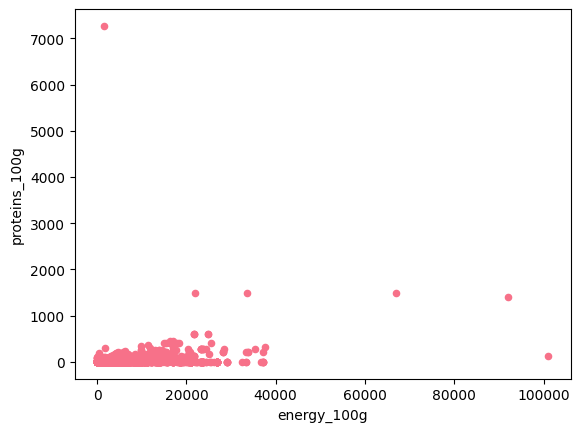

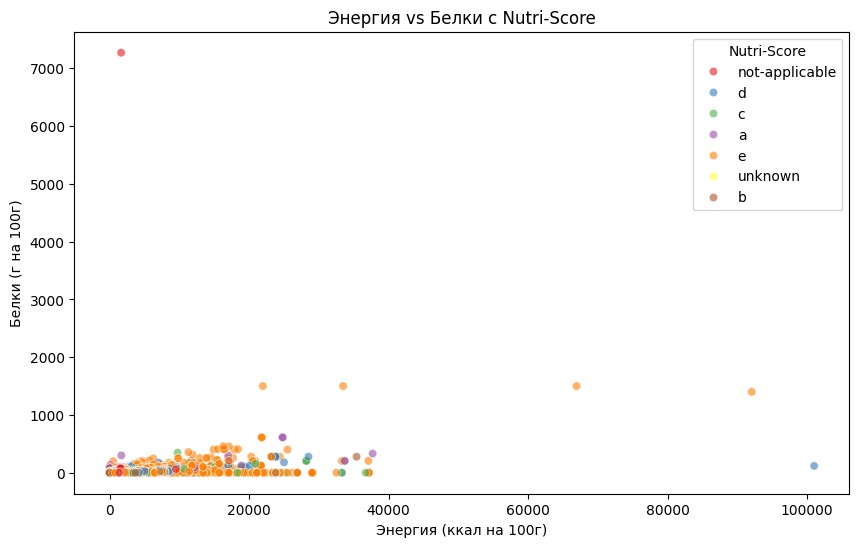

In [39]:
df_clean.plot(kind="scatter", x="energy_100g", y="proteins_100g")
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x="energy_100g",
    y="proteins_100g",
    hue="nutriscore_grade",   # цвет по Nutri-Score, аргумент sns.scatterplot, просит seaborn закрасить колонки
    palette="Set1",
    alpha=0.6
)
plt.title("Энергия vs Белки с Nutri-Score")
plt.xlabel("Энергия (ккал на 100г)")
plt.ylabel("Белки (г на 100г)")
plt.legend(title="Nutri-Score")
plt.show()

### Упражнение 3b: Коробчатые диаграммы - Распределение питательных веществ по Nutri-Score

**Цель:** Использовать коробчатые диаграммы для сравнения пищевой ценности между различными оценками Nutri-Score.

**Инструкции:**
1. Создайте коробчатые диаграммы для энергетической ценности по оценке Nutri-Score
2. Создайте коробчатые диаграммы для содержания сахара по оценке Nutri-Score
3. Попробуйте комбинированную технику коробчатая диаграмма + strip plot из лекции
4. Сравните результаты: Как различаются пищевые показатели по оценкам A-E?

In [ ]:
# Упражнение 3b: Коробчатые диаграммы
# TODO: Реализуйте когда датасет загружен


print("Цели упражнения 3b:")
print("1. Сравнить энергию по оценкам Nutri-Score")
print("2. Проанализировать паттерны содержания сахара")
print("3. Применить комбинированные техники визуализации")
print("4. Интерпретировать что делает продукты более/менее здоровыми")

Text(0, 0.5, 'Сахар на 100г')

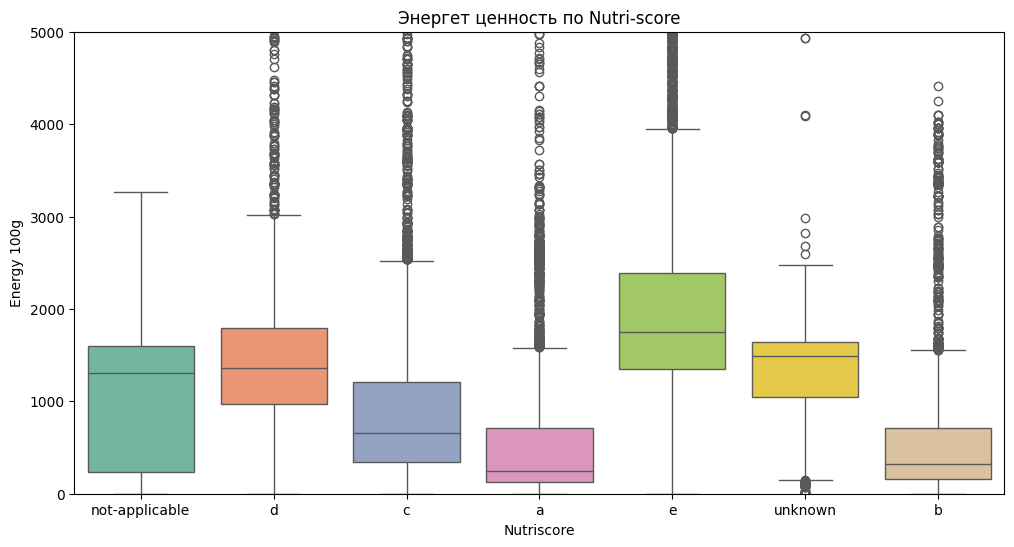

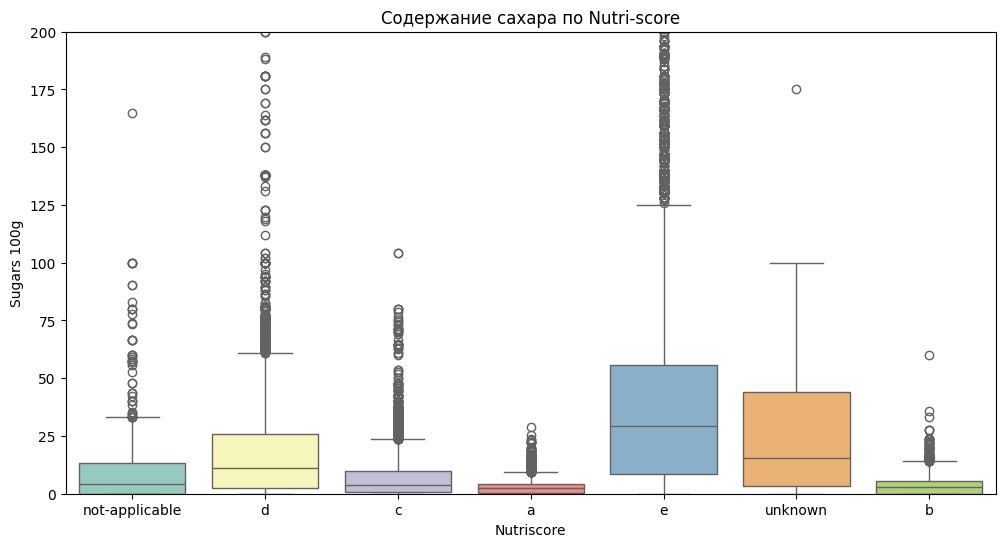

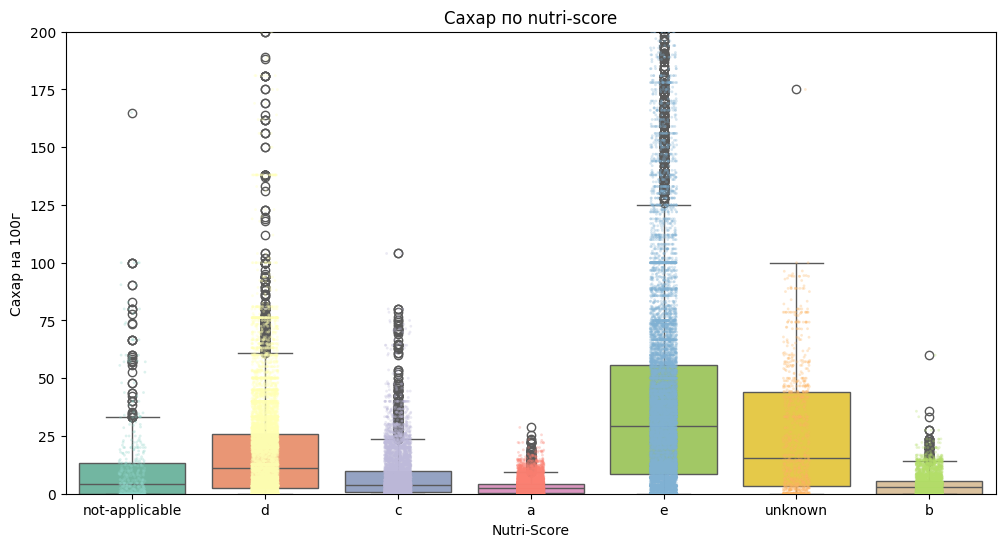

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean,
    x="nutriscore_grade",
    y="energy_100g",
    palette="Set2"
)
plt.ylim(0, 5000)
plt.title("Энергет ценность по Nutri-score")
plt.xlabel("Nutriscore")
plt.ylabel("Energy 100g")


plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean,
    x='nutriscore_grade',
    y='sugars_100g',
    palette="Set3"
)
plt.ylim(0, 200)
plt.title("Содержание сахара по Nutri-score")
plt.xlabel("Nutriscore")
plt.ylabel("Sugars 100g")


plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean,
    x="nutriscore_grade",
    y="sugars_100g",
    palette = "Set2"
)
sns.stripplot(
    data=df_clean,
    x="nutriscore_grade",
    y="sugars_100g",
    palette = "Set3",
    alpha=0.3,
    size=2
)
plt.ylim(0, 200)
plt.title("Сахар по nutri-score")
plt.xlabel("Nutri-Score")
plt.ylabel("Сахар на 100г")




### Упражнение 3c: Скрипичные диаграммы и KDE - Анализ распределений

**Цель:** Использовать скрипичные диаграммы и KDE для анализа формы распределений питательных веществ.

**Инструкции:**
1. Создайте скрипичные диаграммы для содержания жиров по оценке Nutri-Score
2. Используйте KDE графики для сравнения распределений белка по оценкам
3. Экспериментируйте с обеими техниками и сравните их выводы
4. Определите какие продукты имеют необычные пищевые профили

In [ ]:
# Упражнение 3c: Скрипичные диаграммы и KDE
# TODO: Реализуйте когда датасет загружен

# CODE

print("Цели упражнения 3c:")
print("1. Исследовать распределения содержания жиров")
print("2. Сравнить паттерны белка используя KDE")
print("3. Выявить мультимодальные распределения")
print("4. Понять различия форм между оценками")

(-100.0, 200.0)

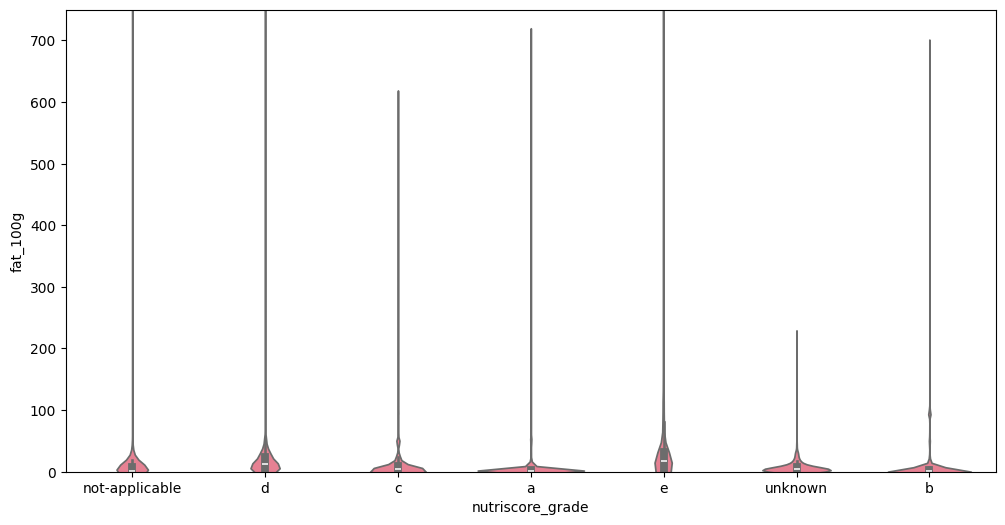

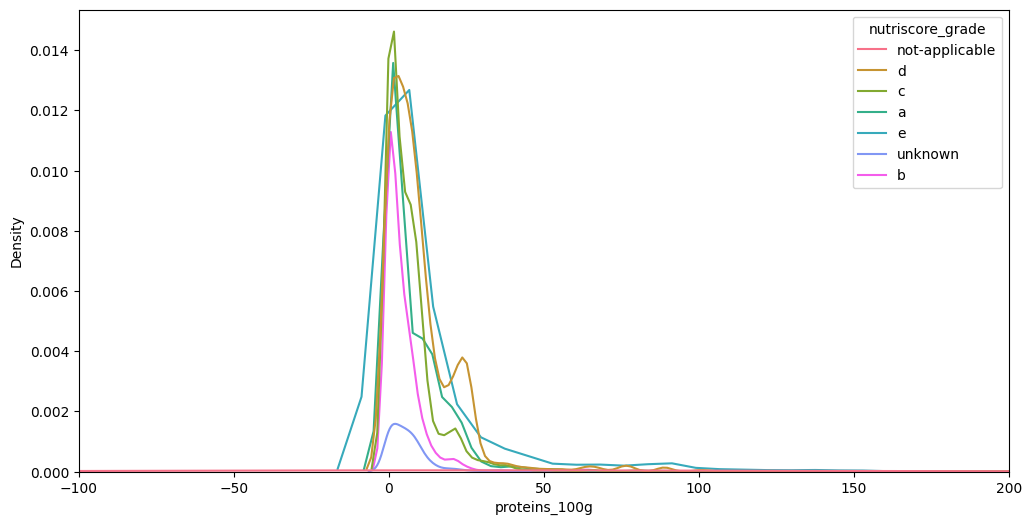

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df_clean,
    x="nutriscore_grade",
    y="fat_100g"
)
plt.ylim(0,750)

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=df_clean,
    x="proteins_100g",
    hue="nutriscore_grade"
)
plt.xlim(-100, 200)

## Упражнение 4: Продвинутый многомерный анализ

### Упражнение 4a: Парные графики - Взаимосвязи питательных веществ

**Цель:** Использовать парные графики для исследования взаимосвязей между всеми пищевыми переменными одновременно.

**Инструкции:**
1. Создайте парный график для основных пищевых компонентов (энергия, белок, углеводы, жиры)
2. Используйте цветовое кодирование по оценке Nutri-Score
3. Попробуйте и гистограмму, и KDE на диагонали
4. Определите наиболее сильные корреляции и наиболее разделимые питательные вещества

In [ ]:
# Упражнение 4a: Парные графики
# TODO: Реализуйте когда датасет загружен

# CODE

print("Цели упражнения 4a:")
print("1. Проанализировать все пищевые взаимосвязи одновременно")
print("2. Определить наиболее сильные корреляции")
print("3. Сравнить гистограмму против KDE на диагонали")
print("4. Найти какие питательные вещества лучше всего разделяют оценки Nutri-Score")

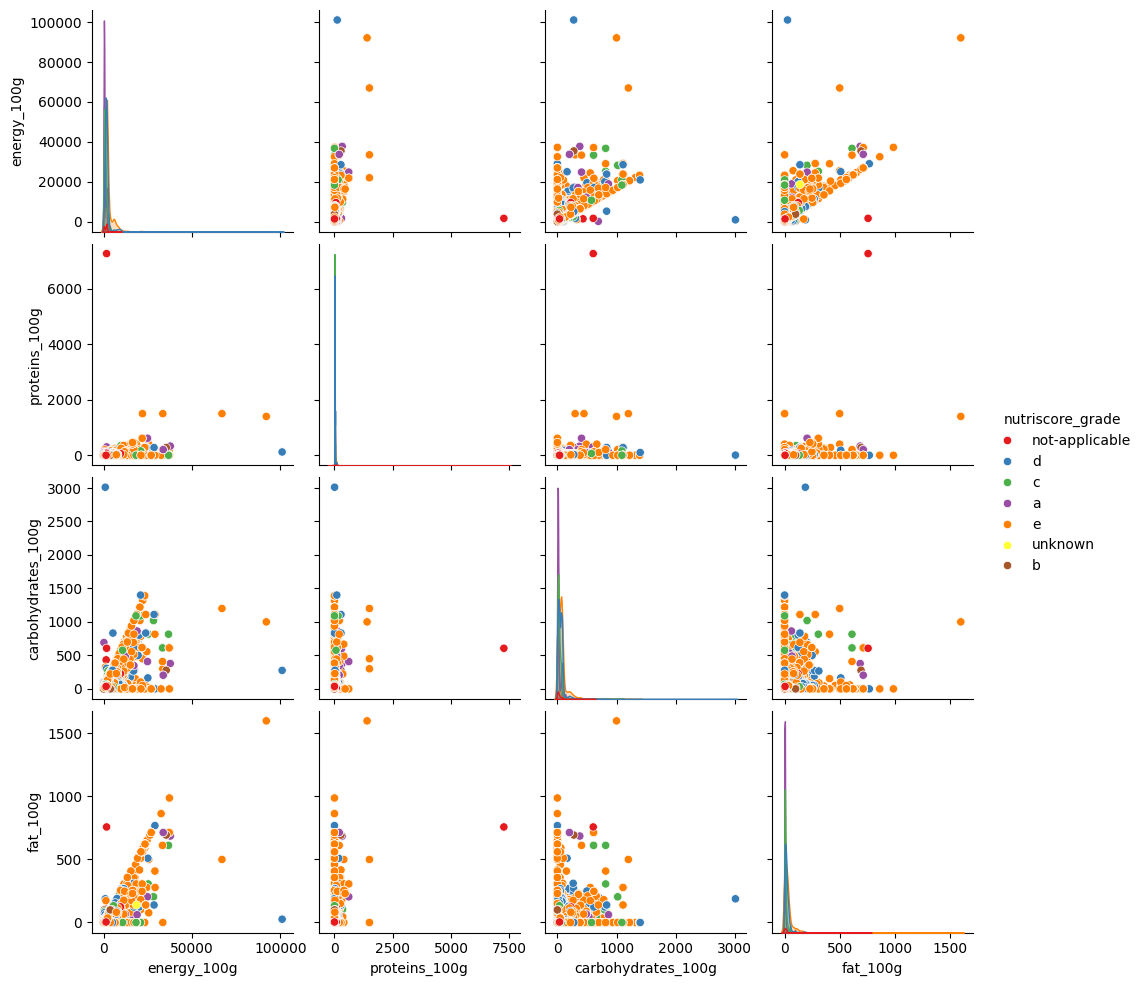

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

nutrient_cols=["energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g" ]
sns.pairplot(
    df_clean[nutrient_cols + ["nutriscore_grade"]],
    hue="nutriscore_grade",
    palette="Set1", 
    diag_kind="kde"
    )

### Упражнение 4b: Продвинутые многомерные техники

**Цель:** Применить сложные методы визуализации из лекции: Кривые Эндрюса, Параллельные координаты и RadViz.

**Инструкции:**
1. Используйте Кривые Эндрюса для визуализации пищевых паттернов
2. Создайте график Параллельные координаты для профилей питательных веществ
3. Примените RadViz для просмотра кластеризации питательных веществ
4. Сравните выводы от каждого метода

In [ ]:
# Упражнение 4b: Продвинутые многомерные техники
# TODO: Реализуйте когда датасет загружен

# Подготовьте данные для продвинутых визуализаций
# df_advanced = df_nutrition.sample(1000, random_state=42)  # Выборка для производительности

# CODE

print("Цели упражнения 4b:")
print("1. Применить Кривые Эндрюса для поиска пищевых паттернов")
print("2. Использовать Параллельные координаты для сравнения профилей")
print("3. Исследовать кластеризацию RadViz похожих продуктов")
print("4. Сравнить выводы от каждого продвинутого метода")

Text(0.5, 1.0, 'RADVIZ')

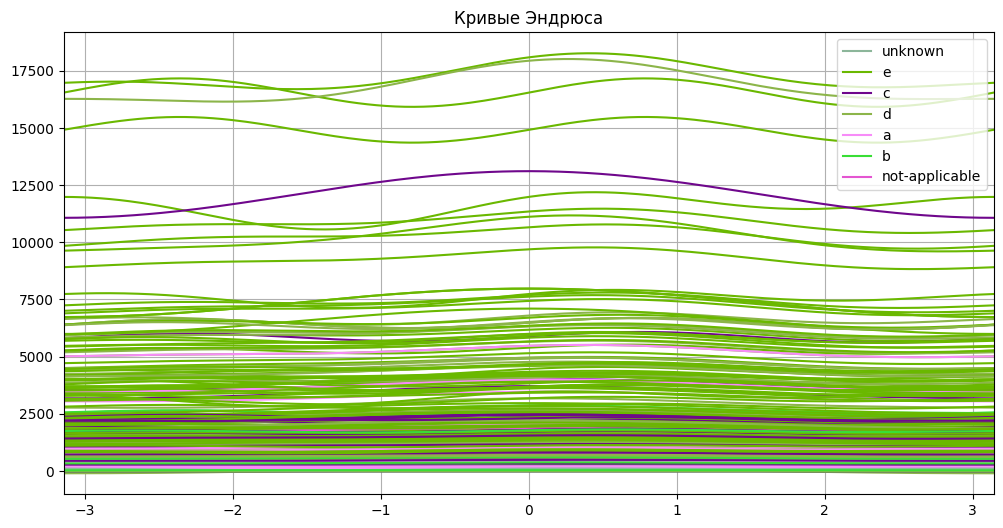

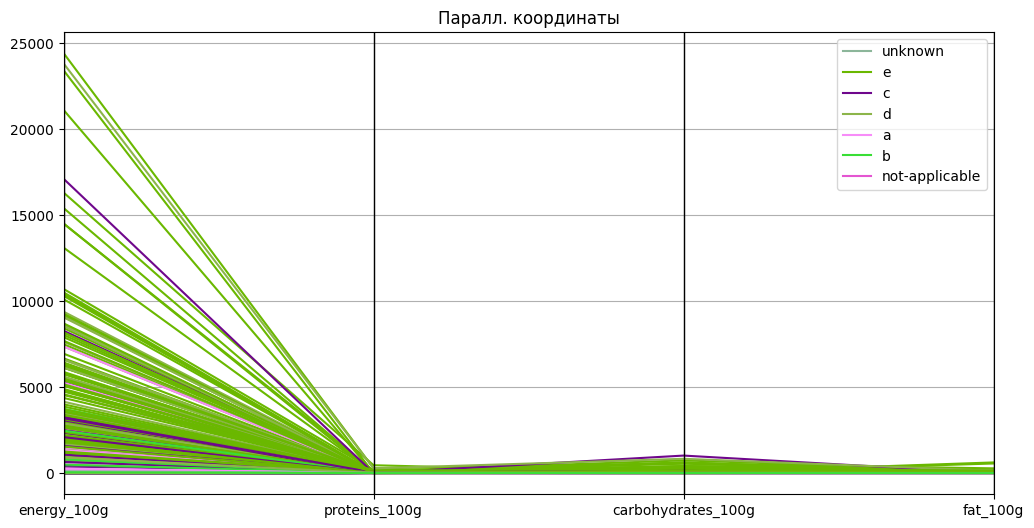

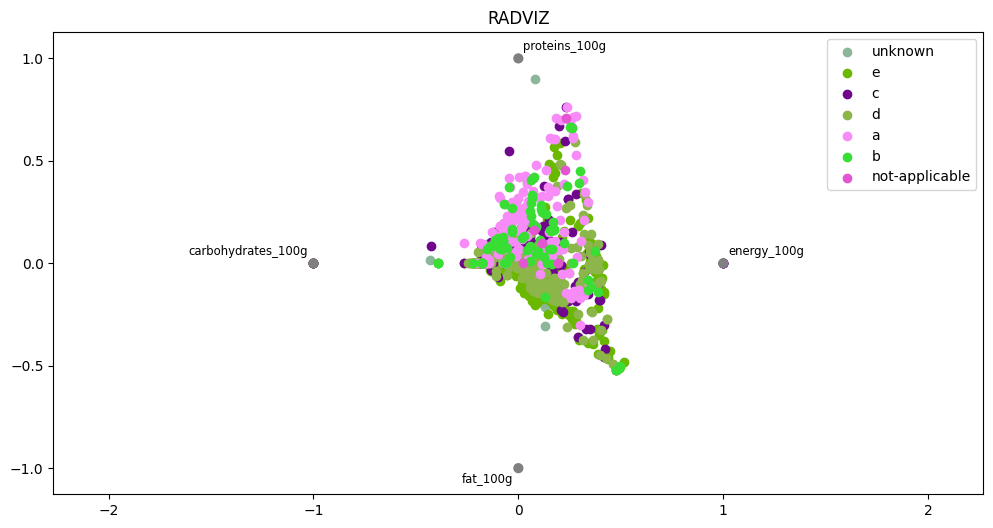

In [71]:
from pandas.plotting import andrews_curves, parallel_coordinates, radviz
import matplotlib.pyplot as plt

df_advanced = df_clean.sample(1000, random_state=42)
nutrient_cols=["nutriscore_grade", "energy_100g", "proteins_100g", "carbohydrates_100g", "fat_100g" ]
plt.figure(figsize=(12,6))
andrews_curves(df_advanced[nutrient_cols], "nutriscore_grade")
plt.title("Кривые Эндрюса")

plt.figure(figsize=(12,6))
parallel_coordinates(df_advanced[nutrient_cols], "nutriscore_grade")
plt.title("Паралл. координаты")

plt.figure(figsize=(12,6))
radviz(df_advanced[nutrient_cols], "nutriscore_grade")
plt.title("RADVIZ")

## Упражнения-вызовы

Готовы к более продвинутым вызовам? Эти упражнения проверят ваше понимание и креативность!

### Вызов 1: Анализ категорий
**Задача:** Проанализируйте как пищевая ценность варьируется между различными категориями продуктов.
- Извлеките и очистите столбец `categories`
- Создайте визуализации, сравнивающие основные категории продуктов
- Найдите какие категории имеют лучшие/худшие пищевые профили

### Вызов 2: Географический анализ  
**Задача:** Исследуйте пищевые различия между странами.
- Разберите столбец `countries`  
- Сравните пищевые стандарты между различными регионами
- Определите страны с самыми здоровыми пищевыми продуктами

### Вызов 3: Собственные выводы
**Задача:** Найдите свой собственный интересный паттерн в данных.
- Выберите аспект данных, который вас интересует
- Примените множественные техники визуализации
- Представьте убедительную историю о ваших находках

### Вызов 4: Интерактивная панель
**Задача:** Создайте интерактивную визуализацию (если знаете Plotly/Bokeh).
- Разрешите фильтрацию по категории, стране или Nutri-Score
- Включите масштабирование и наведение для деталей
- Сделайте это полезным для анализа пищевой промышленности

In [ ]:
# Пространство для упражнений-вызовов
# Используйте эту ячейку и создайте дополнительные ячейки ниже для ваших решений вызовов

# Вызов 1: Пример структуры анализа категорий
# TODO: Реализуйте анализ категорий

# Пример подхода для Вызова 1:
# 1. Извлеките основные категории из столбца categories
# df_clean['main_category'] = df_clean['categories'].str.split(',').str[0]
# 
# 2. Группируйте по категориям и анализируйте средние значения питания
# category_nutrition = df_clean.groupby('main_category')[nutrition_vars].mean()
# 
# 3. Создайте визуализации
# - Тепловая карта категорий против питательных веществ
# - Коробчатые диаграммы сравнивающие категории
# - Радарные диаграммы для профилей категорий

print("💡 Советы для вызовов:")
print("1. Начните с исследования и очистки данных")
print("2. Выберите подходящую визуализацию для вашего вопроса")  
print("3. Всегда интерпретируйте ваши результаты")
print("4. Учитывайте вашу аудиторию при проектировании графиков")
print("5. Не забывайте правильно обрабатывать пропущенные данные")

## Резюме и рефлексия

### Что вы практиковали:
**Загрузка и очистка данных** - Работа с реальными грязными данными  
**Базовая визуализация** - Диаграммы рассеяния, коробчатые диаграммы, скрипичные диаграммы  
**Продвинутые техники** - Парные графики, кривые Эндрюса, параллельные координаты, RadViz  
**Статистический анализ** - KDE, анализ распределений, обнаружение выбросов  
**Многомерный анализ** - Исследование сложных взаимосвязей  

### Ключевые выводы:
1. **Реальные данные грязные** - очистка критически важна для осмысленного анализа
2. **Множественные перспективы важны** - разные графики раскрывают разные выводы  
3. **Цветовое кодирование мощно** - категориальные переменные добавляют глубину анализу
4. **Продвинутые техники** - полезны для сложных многомерных взаимосвязей
5. **Контекст имеет значение** - доменные знания помогают интерпретировать результаты

### Следующие шаги:
- Попробуйте с различными датасетами (данные ВОЗ о здоровье, экономические показатели и т.д.)
- Изучите библиотеки интерактивной визуализации (Plotly, Bokeh)
- Исследуйте статистическое тестирование наряду с визуализацией
- Практикуйте рассказывание историй с данными для презентаций

### Ресурсы для дальнейшего изучения:
- **Документация Seaborn:** https://seaborn.pydata.org/
- **Галерея Matplotlib:** https://matplotlib.org/gallery/
- **Визуализация Pandas:** https://pandas.pydata.org/docs/user_guide/visualization.html
- **Книги по визуализации данных:** "The Grammar of Graphics", "Storytelling with Data"

## Дополнительные учебные материалы

### Если вы хотите углубить знания:

**Книги:**
- "The Grammar of Graphics" - Leland Wilkinson (теоретические основы)
- "Storytelling with Data" - Cole Nussbaumer Knaflic (практические советы)
- "Data Visualization: A Practical Introduction" - Kieran Healy

**Онлайн ресурсы:**
- [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) - официальное руководство
- [Matplotlib Gallery](https://matplotlib.org/stable/gallery/) - примеры графиков
- [Python Graph Gallery](https://python-graph-gallery.com/) - коллекция графиков с кодом

**Видео курсы:**
- Data Visualization with Python на Coursera
- Matplotlib и Seaborn на YouTube
- "Fundamentals of Data Visualization" на edX

**Практические проекты:**
- Анализ данных Kaggle competitions
- Визуализация открытых данных правительства
- Создание дашбордов для бизнес-анализа

### Следующие темы для изучения:
1. **Интерактивная визуализация:** Plotly, Bokeh, Altair
2. **Веб-дашборды:** Streamlit, Dash
3. **Географическая визуализация:** Folium, GeoPandas
4. **Статистическая визуализация:** Корреляционный анализ, регрессия
5. **Большие данные:** Datashader для работы с миллионами точек